# Exploratory Data Analysis on Black Friday Dataset

### Picking up a Dataset

Kaggle is a very good place to find numerous datasets. I chose the Black Friday Dataset. 
URL: https://www.kaggle.com/mehdidag/black-friday

In [1]:
#Importing the necessary libaries. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Acquiring the pickled data and also getting some isights of the dataset.

import pickle
pickle_in = open('dw_bf.pickle','rb')
df = pickle.load(pickle_in)
pickle_in.close()


In [3]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,6.784907,3.871773,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,6.211618,6.265963,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,0.000000,0.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,0.000000,0.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,5.000000,0.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,8.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [4]:
#To find the count of distinct values in the dataset. 
#df.apply(pd.Series.nunique)
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               18
Product_Category_3               16
Purchase                      17959
dtype: int64

#### We can see from the above data that all the columns except 'Purchase' column are categorical values and the 'Purchase' column would be considered as non-categorical. 

In [5]:
# Dropping the unnecessary columns.
df.drop(columns = ["User_ID","Product_ID"],inplace=True)

#### Looking at the data columns, we could begin to think what are the questions that could be answered.

### Analyzing data for research - 
#### Q) Who is more likely to spend more in a black Friday sale?
    1) Men or Women.
    2) Married or Un-Married
    3) Old Residents or new residents/visitors
#### Q) Which type of products are more likely to be sold in a sale like black Friday?
#### Q) Which type of products are common among men and which among women?
#### Prediction/classification -
    1) Predict Age of a customer based on the rest of available data.
    2) Predict gender of a customer based on rest of data.
    3) Predict amount of purchase based on rest of data.
#### Recommendation -
    1) Suggest products based on age.
    2) Suggest products based on location customers belong to.
    3) Suggest products based on gender.
    
#### The answers to the above questions can be found using some plots.

Text(0.5, 1.0, 'Transactions made by gender')

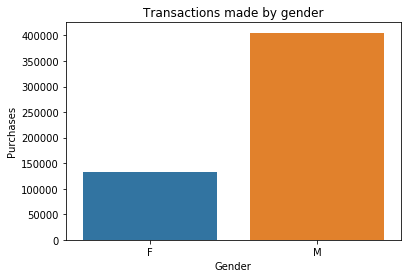

In [6]:
# Plotting a countplot of 'Gender' column
sns.countplot(df['Gender'])
plt.xlabel('Gender')
plt.ylabel('Purchases')
plt.title("Transactions made by gender")

#### Looking at above count plot, it looks like very a smaller number of females attended the Black Friday sale. But it could also mean a few number of females paid for the products and may be their spouse paid for them.

Text(0.5, 1.0, 'Purchases made by age')

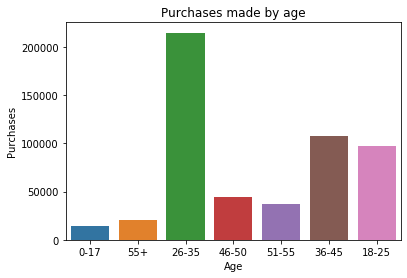

In [7]:
# Plotting a countplot of 'Age' column
sns.countplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('Purchases')
plt.title('Purchases made by age')

#### From the above count plot for age, it seems like the majority of the population ranging from the age 26-35 attended the sale.

#### Further, we could also check among the age groups, which gender was a majority by adding a hue. And as seen below, more males shopped in the sale than the females.

Text(0.5, 1.0, 'Money spent by Male/Female')

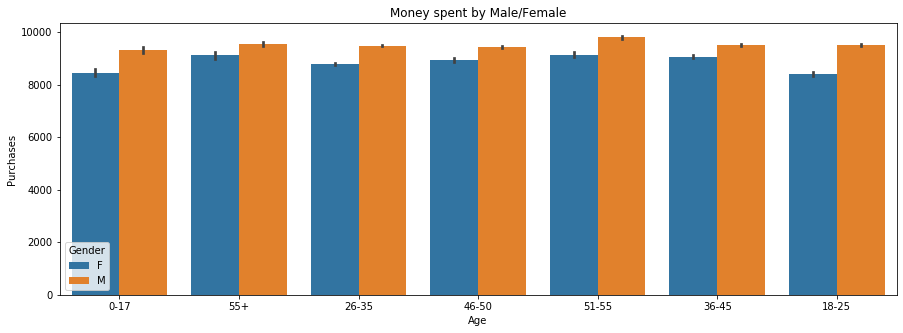

In [8]:
# Plotting the bar plot of 'Age' column with specifying the 'hue'.
#sns.countplot(df['Age'], hue=df['Gender'])
plt.figure(figsize=(15,5))
sns.barplot(x="Age", y="Purchase", hue="Gender", data = df)
plt.xlabel('Age')
plt.ylabel('Purchases')
plt.title('Money spent by Male/Female')

#### We could check further, how many of the males from the age range 26-35 were married? 
#### For this let’s create a column called 'Combined_G_M' that represents ‘Gender’ concatenated with ‘Married_Status’ column and then use it as hue.

In [9]:
#Creating a new column 'Combined_G_M'

df['Combined_G_M'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']), axis=1)
print(df['Combined_G_M'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


Text(0.5, 1.0, 'Transactions made by single vs married people')

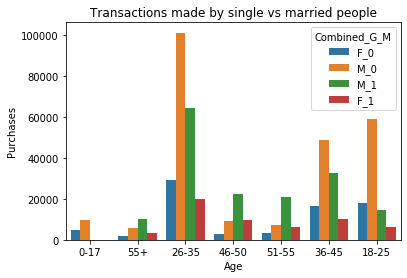

In [10]:
#Using the newly created column as hue to plot a count plot

sns.countplot(df['Age'],hue=df['Combined_G_M'])
plt.xlabel('Age')
plt.ylabel('Purchases')
plt.title('Transactions made by single vs married people')

#### As we see above, there are no bars for married status in the 0-17 age range which makes sense. And then if we look at the 46 and above age groups, unmarried females are very less. But on the other hand, married males paying in the age range 46-55 are also comparatively more than married females. So it could also imply that though ladies do shop a lot, their spouses are possibly paying for it and hence data reflects that men shopped more. If we had more categorical data defining what kind of products were purchased by men, we could dig in this statement further. However, since in this dataset we don't know if there is a category that implies feminine products/clothes we cannot further explore this case.

Text(0.5, 1.0, 'Transactions for Product Category 2')

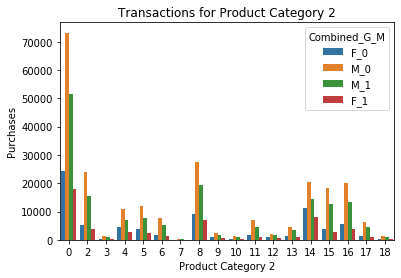

In [11]:
# Plotting the columns 'Product_Category_2' with hue.
sns.countplot(df['Product_Category_2'],hue=df['Combined_G_M'])
plt.xlabel('Product Category 2')
plt.ylabel('Purchases')
plt.title('Transactions for Product Category 2')

Text(0.5, 1.0, 'Transactions for Product Category 3')

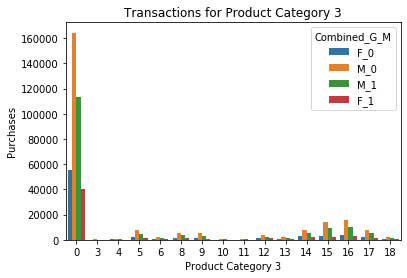

In [12]:
# Plotting the columns 'Product_Category_3' with hue.
sns.countplot(df['Product_Category_3'],hue=df['Combined_G_M'])
plt.xlabel('Product Category 3')
plt.ylabel('Purchases')
plt.title('Transactions for Product Category 3')

#### The above plots show that in both the Product Category 2 and 3, Product - 0 has been purchased the most by all people and unmarried males have the highest number of purchases in both the categories. 

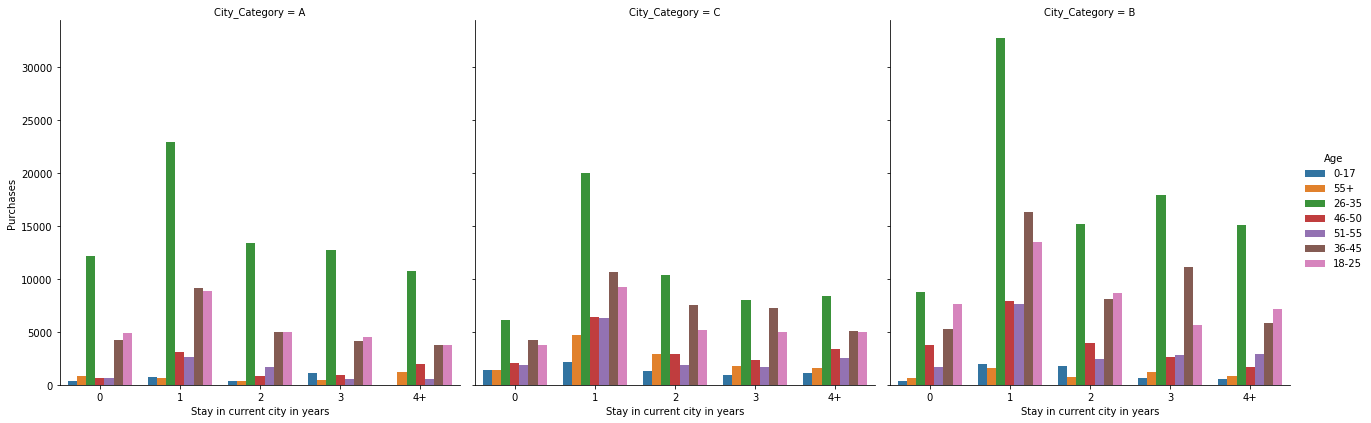

In [13]:
#Plotting a catplot to get more insights on the data.
g = sns.catplot(x='Stay_In_Current_City_Years', hue='Age', col='City_Category', 
            order = ['0','1','2', '3', '4+'], data=df, kind="count" ,height=6, aspect=1)
g.set_axis_labels('Stay in current city in years', 'Purchases')

#### The above plot shows us the number of years people with different age groups have stayed in a city with category A, B and C. 
#### The following observations can be made: 
#### 1) In all the city categories we can see that most purchases are made by people who have stayed for 1 year in their chosen cities.
#### 2) Age group of 26-35 have made most purchases in all the cities.
#### 3) City B is the most popular city for any length of stay. 
#### 4) Old residents are the people who have stayed in a city for 4+ years and new residents/visitors are categorized below 1 years. The total transactions of Old and New residents/visitors are more in City B than City A and C.

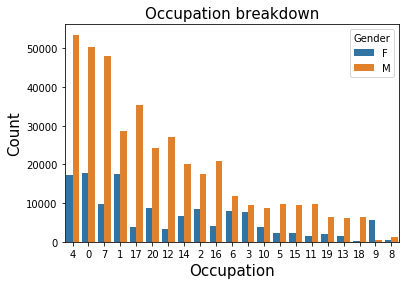

In [14]:
# Plotting a countplot for the Occupation column. 

occupation = df.loc[:,["Gender", "Age", "Occupation"]]
occupation = occupation.groupby(["Occupation", "Gender"]).size().reset_index(name="Count")
sns.countplot(df["Occupation"], hue=df["Gender"], order =df["Occupation"].value_counts().index)
plt.ylabel("Count", fontsize = 15)
plt.xlabel("Occupation", fontsize = 15)
plt.title("Occupation breakdown", fontsize = 15)
plt.show()

#### Occupation 4 has the most people employed for both genders. There are more men working in most occupations except for occupation 9.

### Insights into the Product Categories.

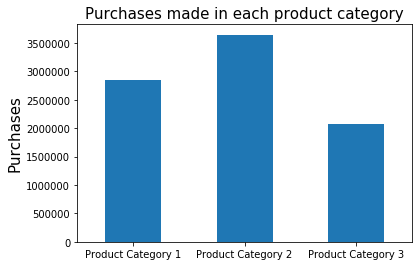

Product category 2 has the most purchases.


In [15]:
# Purchases made in each product category.

products = df.loc[:,("Product_Category_1","Product_Category_2","Product_Category_3")]
labels = ["Product Category 1", "Product Category 2", "Product Category 3"]
products.sum().plot(kind="bar").set_xticklabels(labels, rotation=0)
plt.ylabel("Purchases", fontsize = 15)
plt.title("Purchases made in each product category", fontsize = 15)
plt.show()
print("Product category 2 has the most purchases.")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 11 columns):
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int32
Product_Category_3            537577 non-null int32
Purchase                      537577 non-null int64
Combined_G_M                  537577 non-null object
dtypes: int32(2), int64(4), object(5)
memory usage: 41.0+ MB


### Hypothesis Test for Each Variable to Target Variable

Interpretation

The null hypothesis is that the means of the samples are equal. Rejecting the null hypothesis would imply that at least one of the means is different.
The decision to reject the null hypothesis and accept the alternative hypothesis is based on the significance level of the test (α) and the probability of observing the effect given that the null hypothesis is true (p-value). If p-value ≤ α the null hypothesis is ruled out. We typically use a value of α=0.05, which corresponds to 95% confidence.


### One-way ANOVA test using statsmodels:

In [17]:
# Importing the necessary libaries.
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [18]:
# Computing OLS for the Categorical Variables.
m1 = ols('Purchase ~ C(Gender) + C(Age) + C(City_Category) + C(Stay_In_Current_City_Years) ', df).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     384.1
Date:                Tue, 23 Jul 2019   Prob (F-statistic):               0.00
Time:                        08:41:39   Log-Likelihood:            -5.3369e+06
No. Observations:              537577   AIC:                         1.067e+07
Df Residuals:                  537563   BIC:                         1.067e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

#### Interpreting the table above. 
Let's pull out the really important numbers: 
F (df model, df residuals) = F (13, 537563) = F-statistic = 384.1 and
Prob (F-statistic): 0.00

As the p-value is < 0.05 we reject the null hypothesis. 
The R-squared and the Adj. R-squared is considerably low i.e. 0.009.
Overall the model is significant, F (13, 537563) = 384.1, p = 0.00. This tells us that there is a significant difference in the group means.

#### Coming from the ANOVA framework, the information we are really after in this table is the F-statistic and its corresponding p-value. This tells us if we explained a significant amount of the overall variance. We are still missing some useful information with this method, we need an ANOVA table.

In [19]:
# ANOVA Table.
aov_table = sm.stats.anova_lm(m1, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Gender),4.734173e+10,1.0,1925.806065,0.000000e+00
C(Age),5.650137e+09,6.0,38.306827,8.477981e-47
C(City_Category),6.744958e+10,2.0,1371.884925,0.000000e+00
C(Stay_In_Current_City_Years),7.416168e+08,4.0,7.542025,4.525187e-06
Residual,1.321481e+13,537563.0,NaN,NaN


Let’s break down this ANOVA table. The rows in the table is the between groups effect which is the overall experimental effect. The sum of squares for the model (i.e sum_sq) is how much variance is explained by our model. The current model explains a significant amount of variance, the p < 0.05 for all the variables in the above table. The residual row is the unsystematic variation in the data (also called the unexplained variance; value 1.321481e+13 in the table). In this case, the unsystematic variation represents the individual differences in the Purchase and different relations to the above variables. To test between groups, we need to do some post-hoc testing where we can compare all groups against each other.

### Post-hoc Testing

The overall model was significant, now to test which groups differ. There are a few different techniques that can be used like Fisher’s Least Significant Difference (LSD), Bonferroni correction, Tukey’s HSD etc. 
The technique here in consideration is the Tukey’s HSD.

#### Tukey’s HSD Post-Hoc Comparison

In [20]:
# Importing the necessary libaries.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [21]:
# Perform Tukey's test for the Gender column.
mc = MultiComparison(df['Purchase'], df['Gender'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
  F      M    695.0104 664.1457 725.875  True 
----------------------------------------------


The Tukey HSD post-hoc comparison test controls type I error and maintains the familywise error rate at 0.05 (FWER= 0.05 top of the table). The group1 and group2 columns are the groups being compared, the meandiff column is the difference in means of the two groups being calculated as group2 – group1, the lower/upper columns are the lower/upper boundaries of the 95% confidence interval, and the reject column states whether or not the null hypothesis should be rejected. Also If the reject column says 'True' we reject the null hypothesis and the means are NOT equal, if the reject column says 'False' we accept the null hypothesis and the means are equal. 

In this case the null hypothesis could be rejected.

In [22]:
# Perform Tukey's test for the Age column.
mc1 = MultiComparison(df['Purchase'], df['Age'])
mc1_results = mc1.tukeyhsd()
print(mc1_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff   lower    upper   reject
-------------------------------------------------
 0-17  18-25   215.0707  85.2053  344.936   True 
 0-17  26-35   294.4621  169.3173 419.6068  True 
 0-17  36-45   381.3519  252.269  510.4348  True 
 0-17  46-50   264.7454  125.1087 404.3821  True 
 0-17  51-55   600.4897  457.7051 743.2744  True 
 0-17   55+    433.7717  275.7538 591.7896  True 
18-25  26-35   79.3914   22.7175  136.0653  True 
18-25  36-45   166.2812  101.3727 231.1897  True 
18-25  46-50   49.6747   -34.2845 133.6339 False 
18-25  51-55   385.419   296.3226 474.5155  True 
18-25   55+    218.701   106.8065 330.5955  True 
26-35  36-45   86.8898   32.0325  141.747   True 
26-35  46-50   -29.7167 -106.1715 46.7381  False 
26-35  51-55   306.0276  223.9644 388.0909  True 
26-35   55+    139.3096  32.9302  245.6891  True 
36-45  46-50  -116.6065 -199.3502 -33.8627  True 
36-45  51-55   219.1379  131.1858 307.0899  True 

Here in this comparison we could reject the null hypothesis for all the pair of groups except for the pairs of groups with age range (18-25 and 46-50 ), (26-35 and 46-55) and (36-45 and 55+). 

In [23]:
# Perform Tukey's test for the City_Category column.
mc2 = MultiComparison(df['Purchase'], df['City_Category'])
mc2_results = mc2.tukeyhsd()
print(mc2_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
  A      B    240.6468 201.4538 279.8399  True 
  A      C    886.4308 844.5732 928.2885  True 
  B      C    645.784  608.1905 683.3775  True 
-----------------------------------------------


In this case the null hypothesis could be rejected.

In [24]:
# Perform Tukey's test for the Stay_In_Current_City_Years column.
mc3 = MultiComparison(df['Purchase'], df['Stay_In_Current_City_Years'])
mc3_results = mc3.tukeyhsd()
print(mc3_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff   lower    upper   reject
------------------------------------------------
  0      1    72.6265   13.3478  131.9051  True 
  0      2    150.3687  84.0796  216.6578  True 
  0      3    103.4465  36.2415  170.6515  True 
  0      4+   99.1315   30.1006  168.1624  True 
  1      2    77.7422   24.5286  130.9558  True 
  1      3     30.82    -23.5302 85.1703  False 
  1      4+   26.5051   -30.0874 83.0976  False 
  2      3    -46.9222 -108.8434  14.999  False 
  2      4+   -51.2372 -115.1355 12.6612  False 
  3      4+    -4.315   -69.163   60.533  False 
------------------------------------------------


Here in this comparison we could reject the null hypothesis for all the groups except for the pair of groups such as (1 and 3) , (1 and 4+) , (2 and 3) , (2 and 4+) , (3 and 4+). 

In [25]:
# Computing OLS for the Numerical Variables.
m2 = ols('Purchase ~ Occupation + Marital_Status + Product_Category_1 + Product_Category_2 + Product_Category_3', df).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                 1.607e+04
Date:                Tue, 23 Jul 2019   Prob (F-statistic):               0.00
Time:                        08:41:41   Log-Likelihood:            -5.3020e+06
No. Observations:              537577   AIC:                         1.060e+07
Df Residuals:                  537571   BIC:                         1.060e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.025e+04     17

#### Interpreting the table above. 
Let's pull out the really important numbers: 
F (df model, df residuals) = F (5, 537571) = F-statistic = 1.607e+04 and 
Prob (F-statistic): 0.00

As the p-value is < 0.05 we reject the null hypothesis. 
The R-squared and the Adj. R-squared is high i.e. 0.130.
Overall the model is significant, F (5, 537571) = 1.607e+04, p = 0.00. This tells us that there is a significant difference in the group means.

In [26]:
# ANOVA Table.
aov_table = sm.stats.anova_lm(m2, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Occupation,3.708629e+09,1.0,171.813521,3.013821e-39
Marital_Status,3.971729e+08,1.0,18.400242,1.790664e-05
Product_Category_1,6.509874e+11,1.0,30158.973383,0.000000e+00
Product_Category_2,1.715580e+09,1.0,79.479457,4.887348e-19
Product_Category_3,4.041601e+11,1.0,18723.944610,0.000000e+00
Residual,1.160358e+13,537571.0,NaN,NaN


The current model explains a significant amount of variance, the p < 0.05 for all the variables in the above table. The residual row is the unsystematic variation in the data (also called the unexplained variance; value 1.160358e+13 in the table). In this case, the unsystematic variation represents the individual differences in the Purchase and different relations to the above variables. To test between groups, we need to do some post-hoc testing where we can compare all groups against each other.

#### Tukey’s HSD Post-Hoc Comparison

In [27]:
# Perform Tukey's test for the Occupation column.
mc4 = MultiComparison(df['Purchase'], df['Occupation'])
mc4_results = mc4.tukeyhsd()
print(mc4_results)

 Multiple Comparison of Means - Tukey HSD,FWER=0.05 
group1 group2  meandiff    lower      upper   reject
----------------------------------------------------
  0      1    -169.2436  -276.3503   -62.137   True 
  0      2    -161.0077  -290.6443   -31.3712  True 
  0      3     51.1306    -99.7142   201.9753 False 
  0      4      92.08      -3.135    187.295  False 
  0      5     201.9023   26.1328    377.6717  True 
  0      6     149.4319    6.2273    292.6365  True 
  0      7     315.2285   214.8817   415.5754  True 
  0      8     389.5618   -70.0403   849.1639 False 
  0      9    -472.6108  -708.8243  -236.3973  True 
  0      10   -134.1103   -306.061   37.8403  False 
  0      11    112.5205   -67.4633   292.5042 False 
  0      12    696.1057   573.7443   818.4672  True 
  0      13    237.5027    22.238    452.7674  True 
  0      14    381.5897   253.4874   509.692   True 
  0      15    679.2932   502.4325   856.1539  True 
  0      16    270.1864   138.5653   401.8075 

----------------------------------------------------


Here in this comparison we can see that there are many groups of pairs for which the null hypothesis cannot be rejected. Few such pairs are (0 and 3), (0 and 4), (0 and 8), (0 and 10), (0 and 11), (0 and 18), (1 and 2), (1 and 10), (1 and 18), (2 and 10), (2 and 18), (2 and 20), (3 and 4), (3 and 6), (3 and 8), (3 and 10), (3 and 11), (3 and 13), (3 and 18), (4 and 5), (4 and 6), (4 and 8) ...... (19 and 20). Other than these, we could accept the null hypothesis for all other pairs of groups.

In [28]:
# Perform Tukey's test for the Marital_Status column.
mc5 = MultiComparison(df['Purchase'], df['Marital_Status'])
mc5_results = mc5.tukeyhsd()
print(mc5_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     1.3072  -25.7776 28.392 False 
---------------------------------------------


In this case the null hypothesis cannot be rejected.

In [29]:
# Perform Tukey's test for the Product_Category_1 column.
mc6 = MultiComparison(df['Purchase'], df['Product_Category_1'])
mc6_results = mc6.tukeyhsd()
print(mc6_results)

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
group1 group2   meandiff     lower       upper    reject
--------------------------------------------------------
  1      2     -2352.0207  -2426.8586  -2277.1829  True 
  1      3     -3510.8598  -3591.3649  -3430.3546  True 
  1      4    -11278.8386 -11381.4998 -11176.1774  True 
  1      5     -7369.6975  -7409.3242  -7330.0707  True 
  1      6     2230.1921   2150.2388   2310.1454   True 
  1      7     2766.1287   2588.6899   2943.5674   True 
  1      8     -6110.3466  -6152.9666  -6067.7267  True 
  1      9     1930.5955   1402.1214   2459.0696   True 
  1      10    6072.2729    5920.054   6224.4917   True 
  1      11    -8924.7679  -8998.9878  -8850.5481  True 
  1      12   -12256.5059 -12429.2661 -12083.7457  True 
  1      13    -12885.082 -13031.6896 -12738.4744  True 
  1      14    -462.2495   -737.5945   -186.9045   True 
  1      15    1168.7207   1031.0619   1306.3796   True 
  1      16     1156.456   1045

Here in this comparison we can see that there are only three groups of pairs for which the null hypothesis cannot be rejected. The pairs are (3 and 17), (6 and 9) and (15 and 16). Other than these three we could accept the null hypothesis for all other pairs of groups.

In [30]:
# Perform Tukey's test for the Product_Category_2 column.
mc7 = MultiComparison(df['Purchase'], df['Product_Category_2'])
mc7_results = mc7.tukeyhsd()
print(mc7_results)

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
group1 group2  meandiff    lower      upper    reject
-----------------------------------------------------
  0      2    5925.8863  5843.3439  6008.4287   True 
  0      3    3533.6783   3230.644  3836.7125   True 
  0      4    2522.4647  2414.3845  2630.5448   True 
  0      5    1338.2003  1231.3042  1445.0964   True 
  0      6    3804.7315  3673.2578  3936.2053   True 
  0      7    -818.6202  -1464.9784  -172.262   True 
  0      8     2582.182  2507.3982  2656.9659   True 
  0      9    -413.2607  -630.7908  -195.7307   True 
  0      10   7960.1604  7664.9991  8255.3217   True 
  0      11   1239.8281  1098.7954  1380.8608   True 
  0      12    -727.192  -948.0372  -506.3469   True 
  0      13    1976.41   1814.4806  2138.3394   True 
  0      14   -589.4976  -668.6162   -510.379   True 
  0      15   2662.8689  2571.2561  2754.4818   True 
  0      16   2602.8217  2515.9775  2689.6659   True 
  0      17   1720.6798  157

Here in this comparison we can see that there are many groups of pairs for which the null hypothesis cannot be rejected. Few such pairs are (3 and 6), (4 and 8), (4 and 16), (5 and 11), (7 and 9), (7 and 12), (7 and 14) ...... (17 and 18). Other than these, we could accept the null hypothesis for all other pairs of groups.

In [31]:
# Perform Tukey's test for the Product_Category_3 column.
mc8 = MultiComparison(df['Purchase'], df['Product_Category_3'])
mc8_results = mc8.tukeyhsd()
print(mc8_results)

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
group1 group2  meandiff    lower      upper    reject
-----------------------------------------------------
  0      3     5647.414  4990.7471   6304.081   True 
  0      4    1468.5381  1092.9336  1844.1427   True 
  0      5    3818.5992  3690.2951  3946.9032   True 
  0      6    4880.0602   4647.024  5113.0963   True 
  0      8    4719.8015  4573.0007  4866.6023   True 
  0      9    2119.8419  1967.1229  2272.5609   True 
  0      10   5213.2332  4822.3125   5604.154   True 
  0      11    3802.874  3420.2726  4185.4754   True 
  0      12    408.9995   238.4223   579.5768   True 
  0      13   4873.2496  4652.6579  5093.8414   True 
  0      14   1744.2126  1621.9555  1866.4697   True 
  0      15   4028.4802  3928.2436  4128.7167   True 
  0      16   3672.7475  3579.3288  3766.1662   True 
  0      17   3469.7174  3341.6715  3597.7634   True 
  0      18   2673.8305  2434.4521   2913.209   True 
  3      4    -4178.8759 -49

Here in this comparison we can see that there are many groups of pairs for which the null hypothesis cannot be rejected. Few such pairs are (3 and 10), (4 and 14), (5 and 11), (5 and 16), (6 and 8), (6 and 10), (6 and 13) ...... (11 and 17). Other than these, we could accept the null hypothesis for all other pairs of groups.